In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

#__________________________________First'o Fall We Want To Load Out Data__________________________________

df = pd.read_csv("heart.csv")  

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#__________________________________Then check null values to your dataset__________________________________
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
#______________________Then Descrice Your Dataset______________________
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Now for analyzing purpose we want to change the datatype of column 'Age':- 

df['Age'] = df['Age'].astype(int)

In [6]:
# Now we want to add a new column 'Age Type' which represents the data of Age in a certain range:- 

age_type = []

for ages in df['Age']:
    if ages >= 10 and ages <= 18:
        age_type.append('Teenager')
    elif ages >= 19 and ages <= 30:
        age_type.append('Adult')
    elif ages >= 31 and ages <= 50:
        age_type.append('Aged')
    elif ages >= 51 and ages <= 80:
        age_type.append('Old')

df['Age Type'] = age_type

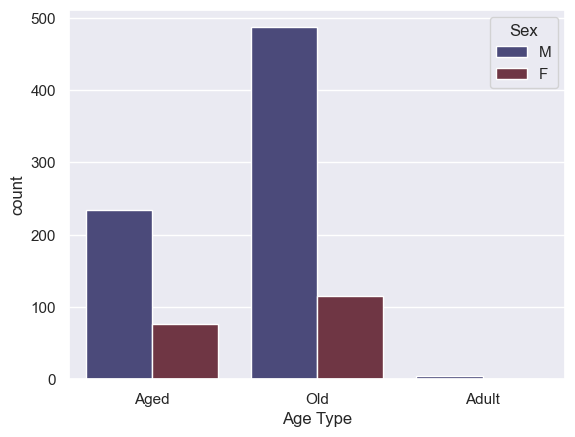

In [7]:
sns.countplot(x='Age Type', data=df, hue='Sex', palette='icefire')
plt.show()

We analyze that most of the patient are old males i,e. the females ratio is less as compare to males 👍

In [8]:
# sns.countplot(x='ChestPainType', data=df, hue='Sex', palette='Accent')
# plt.show()

# sns.countplot(x='ChestPainType', data=df, hue='Age Type', palette='Accent')
# plt.show()

<Figure size 1000x600 with 0 Axes>

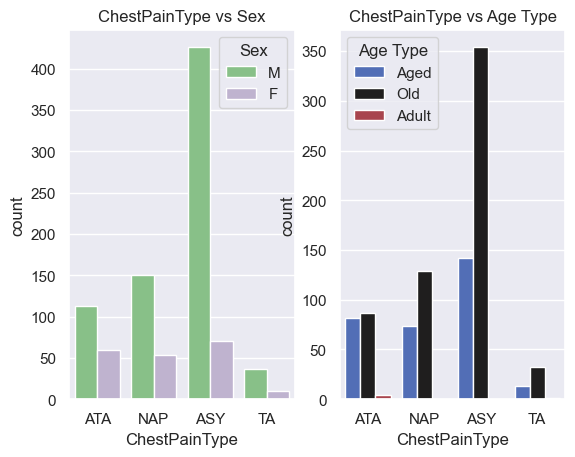

In [9]:
plt.figure(figsize=(10, 6))

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.countplot(x='ChestPainType', data=df, hue='Sex', palette='Accent', ax=ax1)
ax1.set_title('ChestPainType vs Sex')

sns.countplot(x='ChestPainType', data=df, hue='Age Type', palette='icefire', ax=ax2)
ax2.set_title('ChestPainType vs Age Type')

plt.show()


As we can see the most common chest pain type is Asymptomatic (ASY) type. Most of the males are suffered from it.
In this analysis, also the females ratio is less as compare to males.

In another plot we can see that the chest pain happing happening to old people which is ASY type chest pain.

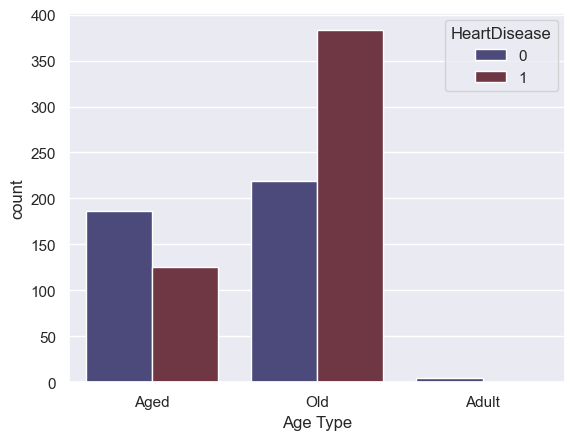

In [10]:
sns.countplot(x='Age Type', data=df, hue='HeartDisease', palette='icefire')
plt.show()

In this plot we can easily see that the heart disease is not happening to adult people it is happening to only aged and old people.

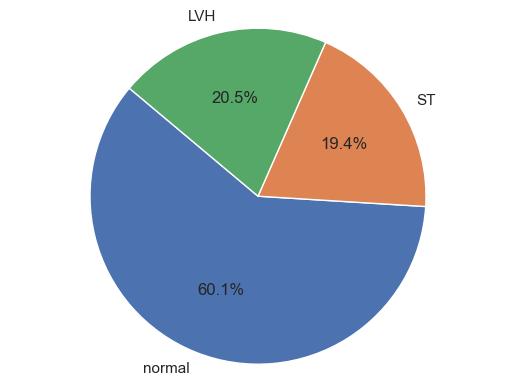

In [11]:
normal = 0
SfT = 0
LfVH = 0

for ECG in df['RestingECG']:
    if ECG == 'Normal':
        normal += 1
    elif ECG == 'ST':
        SfT += 1
    elif ECG == 'LVH':
        LfVH += 1

labels = ['normal', 'ST', 'LVH']
sizes = [normal, SfT, LfVH]

# plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10524\2839002968.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.countplot(x='ST_Slope', data=df, color='lightblue', hue='ExerciseAngina')


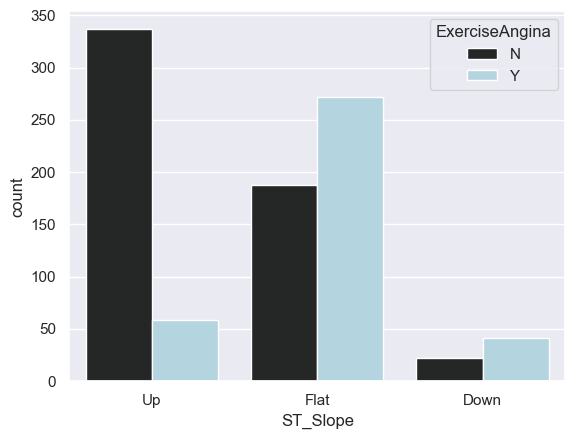

In [12]:
sns.countplot(x='ST_Slope', data=df, color='lightblue', hue='ExerciseAngina')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10524\4269293802.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sns.countplot(x='HeartDisease', data=df, color='lightblue', hue='ExerciseAngina')


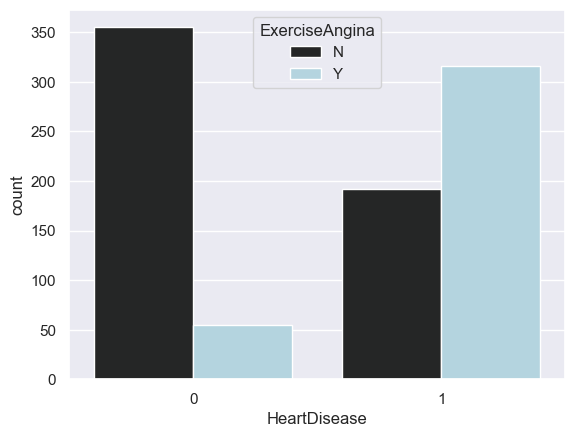

In [13]:
sns.countplot(x='HeartDisease', data=df, color='lightblue', hue='ExerciseAngina')
plt.show()

# Now Applying Statistics On Cholesterol Column:- 

In [14]:
# Now We Will Do Some Statistics On Cholesterol Column:- 

# Standard Deviation of Cholesterol:- 

mean = np.mean(df['Cholesterol'])
square_difference = (df['Cholesterol'] - mean) ** 2
variance = np.mean(square_difference)
std_dev = np.sqrt(variance)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Q1 = np.percentile(df['Cholesterol'],25)
Q3 = np.percentile(df['Cholesterol'],75)

IQR = Q3 - Q1

print('-'*20)
print("First quartile (Q1):", Q1)
print("Third quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)

print('-'*20)

CV = (std_dev/mean) * 100
print('Coefficient Of Variance:', CV)

Mean: 198.7995642701525
Variance: 11951.857429004036
Standard Deviation: 109.32455089779256
--------------------
First quartile (Q1): 173.25
Third quartile (Q3): 267.0
Interquartile Range (IQR): 93.75
--------------------
Coefficient Of Variance: 54.992349354060636


# Applying One Way ANOVA On Cholesterol Column:- 

In [15]:
from scipy.stats import f_oneway

method_a = df['Cholesterol']
method_b = df['RestingBP']
method_c = df['MaxHR']

f_statistic, p_value = f_oneway(method_a, method_b, method_c)

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in means.")

print("F-statistic:", f_statistic)
print("P-value:", p_value)

Reject null hypothesis: There is a significant difference in means.
F-statistic: 293.0461581759045
P-value: 4.2297925869961007e-116


# Now Applying Confidence Level On Cholesterol Data

In [16]:
import math

x_bar = np.mean(df['Cholesterol'])
n = len(df['Cholesterol'])
z_value = 1.96
sigma = std_dev


Lower_level = x_bar - (z_value * (sigma / (math.sqrt(n))))
Higher_level = x_bar + (z_value * (sigma / (math.sqrt(n))))

print("Confidence Interval With 95% Sure:", (Lower_level, Higher_level))

Confidence Interval With 95% Sure: (np.float64(191.7273984868653), np.float64(205.8717300534397))
